# Wordcloud

In [1]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Agrupar las palabras comunes que añaden poco sentido, con stopwords
stopwords = set(STOPWORDS)

In [2]:
stopwords.update(['y','la','para','de'])

In [3]:
type(stopwords)

set

In [4]:
import pandas as pd

### Importamos los datos que vamos a utilizar

In [5]:
dfc = pd.read_csv('dataSets\\para_dashboard\\coursera.csv')

In [6]:
dfe = pd.read_csv('dataSets\\para_dashboard\\edx.csv')

In [7]:
dfu = pd.read_csv('dataSets\\para_dashboard\\udemy.csv')

### Aislamos las series que nos interesan de cada data frame

In [8]:
df_title = dfc[['name']]
dfe= dfe[['name']]
dfu = dfu[['name']]

### Concatenamos los data frames creados en el paso anterior

In [9]:
df_title = pd.concat([df_title, dfe])

In [10]:
df_title = pd.concat([df_title, dfu])

### Enlistamos la serie 

In [11]:
list_title = df_title.name.tolist()

### Convertimos los datos en una gran string 

In [12]:
title_string = ' '.join(list_title)

### Llamamos al constructor de wordcloud y le pasamos la string del paso anterior

In [13]:
#call the wordcloud Constructor 
WC = WordCloud(stopwords=stopwords,max_words=50,background_color="white").generate(title_string)

### Finalmente ploteamos

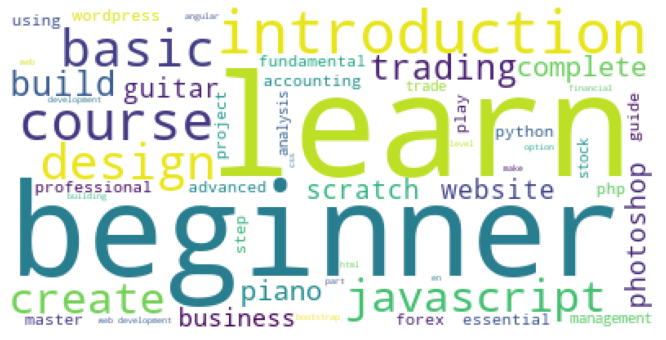

In [14]:
rcParams["figure.figsize"] = (12,6)
plt.imshow(WC)
plt.axis("off")
plt.show()

## veamos que obtenemos para los datasets por separado

In [15]:
def df_column_to_word_cloud(data_frame, column, max_w):
    data_frame = data_frame[[column]]
    list_v = data_frame[column].tolist()
    values_string = ' '.join(list_v)
    WC = WordCloud(stopwords=stopwords,max_words= max_w, background_color='white').generate(values_string)
    return WC

In [16]:
def plot_word_cloud(wc,int_x, int_y):
    rcParams["figure.figsize"] = (int_x,int_y)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

### Coursera

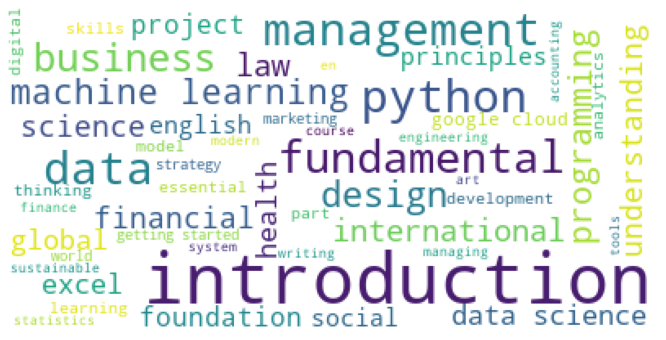

In [17]:
dfc = dfc[['name']]
my_wc = df_column_to_word_cloud(dfc, 'name', 50)
plot_word_cloud(my_wc, 12,6)

### Edx

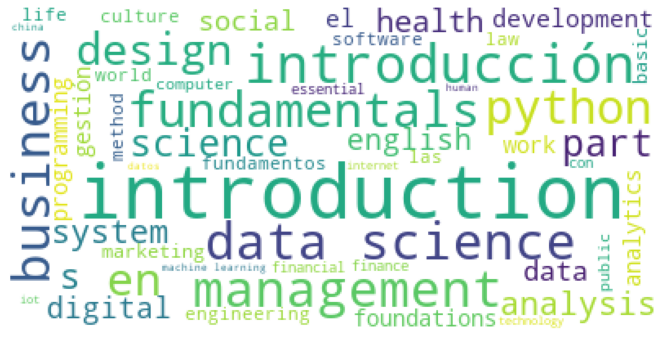

In [18]:
my_wc = df_column_to_word_cloud(dfe, 'name', 50)
plot_word_cloud(my_wc, 12,6)

### Udemy

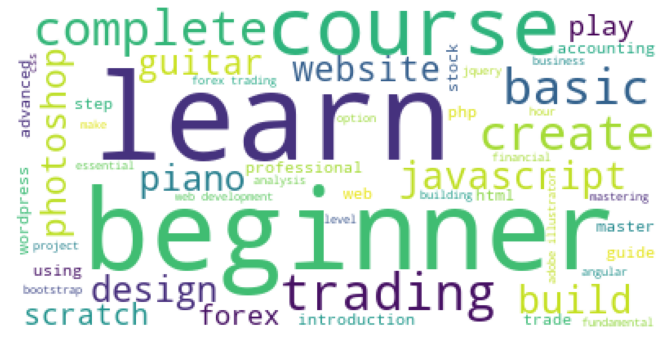

In [19]:
my_wc = df_column_to_word_cloud(dfu, 'name', 50)
plot_word_cloud(my_wc, 12,6)